## Data Visualization, Exploratory Data Analysis (Milestone 1)

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [313]:
data_folder = "../data/"
hpcollection_folder = "hpcollection/"
hpbooks_folder = "hpbooks/"
movies_folder = "movies/"

### Exploring [Harry Potter Collection dataset](https://github.com/theDavidBarton/the-harry-potter-database)

In [314]:
df_hp_chars = pd.read_json(data_folder+hpcollection_folder+"characters.json") 

In [315]:
df_hp_chars[df_hp_chars['name']=='Bellatrix Lestrange'].head(2)

,id,name,birth,death,species,ancestry,gender,hair_color,eye_color,wand,patronus,house,associated_groups,books_featured_in
575,622,Bellatrix Lestrange,1951,"2 May, 1998 (aged 46 - 47)",Human,Pure-blood,Female,Black,None,"12¾"", Walnut, dragon heartstring",None,House of Black,[],"[4, 5, 6, 7]"


#### Exploring the characters

In [316]:
df_hp_chars['id'].count()

707

In the dataset, we can see that there are 707 different characters. We will see the number of recurrent characters throughout the book series. 

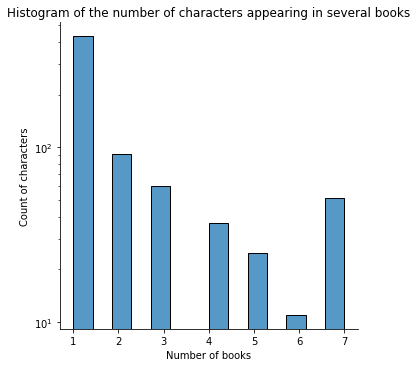

In [317]:
df_hp_chars['nb_books_featured_in'] = df_hp_chars['books_featured_in'].apply(lambda x: len(x))

fig = sns.displot(df_hp_chars['nb_books_featured_in'] )
plt.title("Histogram of the number of characters appearing in several books")
plt.xlabel("Number of books")
plt.ylabel("Count of characters")
plt.yscale('log')
plt.show()

In [318]:
df_hp_chars['nb_books_featured_in'].value_counts()

1    431
2     92
3     60
7     51
4     37
5     25
6     11
Name: nb_books_featured_in, dtype: int64

Note that the y-axis is in log-scale. We can see that there a lot of characters (aroung 2/3) appear in only one book. Another interesting insight is that we have more characters appearing in all the books than characters appearing in only 4,5 or 6 books. 

##### Gender

We first take a look at the different type of gender there are in books.

In [319]:
df_hp_chars['gender'].value_counts()

Male                  437
Female                244
Males                   4
Male (likely)           2
Females                 2
Females, Males          1
Males and females       1
At least one boy        1
Male (most likely)      1
Female (likely)         1
Name: gender, dtype: int64

For the purpose of our visualisation and since the number of exceptions is very small, we will map the gender which are not male or female to the closest gender. 

In [320]:
def map_to_closest_gender(gender):
    if gender is None: 
        return None
    if "female" in gender.lower() or "girl" in gender.lower():
        return "female"
    else:
        return "male"
    
df_hp_chars['gender'] = df_hp_chars['gender'].apply(map_to_closest_gender)

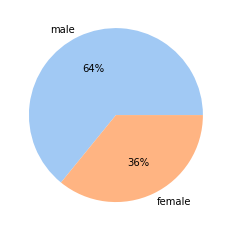

In [321]:
data = df_hp_chars['gender'].value_counts().values
labels = df_hp_chars['gender'].value_counts().index

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

We can see that around 2/3 of the characters in this Harry Potter are men and 1/3 are women. Let see what is the gender of the recurrent characters in the Harry Potter serie. 

In [322]:
data = df_hp_chars.loc[:,["gender", "nb_books_featured_in"]].value_counts()
data
df_hp_chars.loc[:,["gender", "nb_books_featured_in"]].value_counts()

gender  nb_books_featured_in
male    1                       273
female  1                       148
male    2                        57
        3                        40
female  2                        34
male    7                        32
        4                        23
female  3                        19
        7                        19
        4                        14
male    5                        13
female  5                        11
male    6                         7
female  6                         4
dtype: int64

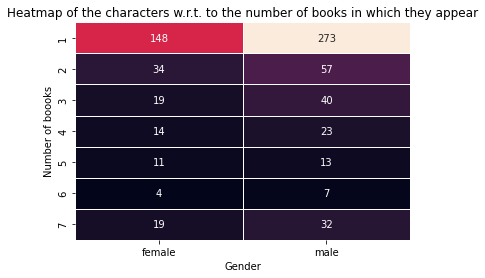

In [323]:
sns.heatmap(pd.crosstab(df_hp_chars['nb_books_featured_in'],df_hp_chars['gender']), annot=True, fmt="d", linewidths=.5, cbar=False)
plt.title('Heatmap of the characters w.r.t. to the number of books in which they appear')
plt.xlabel('Gender')
plt.ylabel('Number of boooks')
plt.show()

As we can see, males are around 1.5 or twice more present than female in each category. This could introduces some biases in subsequent analysis and we must be careful. 

##### Houses

When a new wizard goes to Hogwarts to learn magic, (s)he will first be splitted into one of the houses: Gryffindor, Ravenclaw, Slytherin or Hufflepuff. We will now take a look at our list characters and see which are the most dominant houses. 

Before being able to do this, we will have to do some cleaning on the data as we can see that there are a lot more houses than the 4 expected. 

In [324]:
df_hp_chars['house'].value_counts()

Gryffindor                                       56
Slytherin                                        36
Ravenclaw                                        29
Hufflepuff                                       23
House of Black                                    9
Malfoy family                                     3
Gryffindor (possibly)                             3
Slytherin (possibly)                              3
Unknown                                           3
House of Gaunt                                    2
Gryffindor, Hufflepuff, or Slytherin              2
Ravenclaw (possibly)                              2
House of Black (formerly)                         2
Gryffindor (likely)                               2
Slytherin (likely)                                2
Hufflepuff (likely)                               2
Riddle family (formerly)                          1
Hufflepuff (possibly)                             1
Lord Voldemort                                    1
Hogwarts Sch

Surprisingly, He-Who-Must-Not-Be-Named seems to have created a new house... 

In [325]:
df_hp_chars[df_hp_chars['house']=='Lord Voldemort'].head(10)

,id,name,birth,death,species,ancestry,gender,hair_color,eye_color,wand,patronus,house,associated_groups,books_featured_in,nb_books_featured_in
241,244,Rodolphus Lestrange,Pre 1964,None,Human,Pure-blood,male,Dark,Dark,None,None,Lord Voldemort,[],"[4, 5, 7]",3


Rodolphus Lestrange is in fact one of the most death eather serving Lord Voldemort, it is also known that it belongs to the Slytherin house, we will correct this in a global function later. A choice that we choose to make is for all the house such as Gryffindor (likely) we will put them in the Gryffindor house. The next interesting thing is that the basilisk (which is a snake seems to belong to an house), we will remove this from the house column and put in the associated groups later. 

In [326]:
df_hp_chars[df_hp_chars['house']=='Salazar Slytherin'].head(10)

,id,name,birth,death,species,ancestry,gender,hair_color,eye_color,wand,patronus,house,associated_groups,books_featured_in,nb_books_featured_in
653,700,Serpent of Slytherin,c. 993,"29 May, 1993 (aged around 1000)",Basilisk,None,female,None,Yellow,None,None,Salazar Slytherin,[],"[2, 3, 4, 5, 6, 7]",6


The same thing will happen to people belonging to the House of Gaunt whose member were not able to attend courses at Hogwarts. 

Phineas Nigellus Black is a wizard belonging to the Slytherin house and become later headmaster of Hogwarts, we will also correct this issue. All humans from the Black family are known to belong to the Slytherin house (except Sirius =D), we will therefore also move them into the corresponding house. Similarly, all the members of the Malfoy family are known to belong the Slytherin house. The other cases not discussed are negligible and the house will be removed

In [327]:
def custom_association(name, house,cur_x):
    if house == "House of Gaunt":
        return cur_x + ["House of Gaunt"]
    elif house == "House of Gaunt (abandoned)":
        return cur_x + ["House of Gaunt","Riddle family"]
    elif name == "Tom Riddle (Voldemort)":
        return cur_x + ["Lord Voldemort","House of Gaunt", "Riddle family", "Hogwarts School of Witchcraft and Wizardry"]
    elif name == "Narcissa Malfoy":
        return cur_x + ["House of Black",'Malfoy family', "Hogwarts School of Witchcraft and Wizardry"]
    elif name == "Bellatrix Lestrange":
        return cur_x + ["House of Black",'Malfoy family', "Hogwarts School of Witchcraft and Wizardry"]
    elif house == "House of Black":
        return  cur_x+["House of Black"]
    elif house == 'House of Black (formerly)':
        return  cur_x+["House of Black"]
    elif house == 'Malfoy family':
        return  cur_x+['Malfoy family']
    elif house == "Riddle family (formerly)":
        return  cur_x+["Riddle family"]
    elif house == "Hogwarts School of Witchcraft and Wizardry":
        return  cur_x+["House of Black"]
    else:
        return cur_x

        
    

def format_house(house):
    if house is None:
        return None
    if house == "Lord Voldemort" or house=='Hogwarts School of Witchcraft and Wizardry': 
        return "Slytherin"
    elif "Hufflepuff" in house:
        return "Hufflepuff"
    elif "Gryffindor" in house:
        return "Gryffindor"
    elif "Slytherin" in house or "House of Black" in house:
        return "Slytherin"
    elif "Ravenclaw" in house:
        return "Ravenclaw"
    else: 
        return None
    
def add_house_as_association_if_not_already(house, assoc):
    if house is None:
        return assoc
    else: 
        if 'Hogwarts School of Witchcraft and Wizardry' in assoc:
            return assoc if house in assoc else assoc +[house]
        else:
            return assoc if house in assoc else assoc +[house,'Hogwarts School of Witchcraft and Wizardry']
        

In [328]:
df_hp_chars['associated_groups'] = df_hp_chars.apply(lambda x: custom_association(x['name'], x['house'], x['associated_groups']),axis=1)

In [329]:
df_hp_chars['house'] = df_hp_chars['house'].apply(format_house)
df_hp_chars['associated_groups'] = df_hp_chars.apply(lambda x: add_house_as_association_if_not_already(x['house'], x['associated_groups']),axis=1)

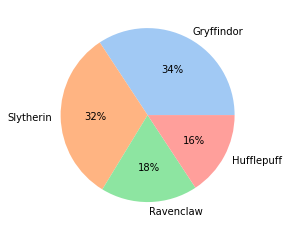

In [330]:
data = df_hp_chars['house'].value_counts().values
labels = df_hp_chars['house'].value_counts().index

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

As exepected, we can see that the majority of the characters belong to the rival houses Gryffindor and Slytherin. Nevertheless, we would have expected less characters in the two other houses. This is good as our visualisation will be more balance between the houses. 

##### Wands

In [337]:
df_wands = pd.read_json(data_folder+hpcollection_folder+"wand.json") 

In [341]:
df_wands.shape

(27, 5)

We can see that despite the high number of characters shown in the book series, we only know the wand composition of 27 of them. For our interactive visualisation with wand, this can be a bit limiting but the known wands are probably the ones of the most known characters, this will do the job. 

In [351]:
df_hp_chars = df_hp_chars.merge(df_wands, how='left',left_on='name', right_on='name').drop('wand', axis=1)
df_hp_chars.head(2)

,id,name,birth,death,species,ancestry,gender,hair_color,eye_color,patronus,...,books_featured_in,nb_books_featured_in,wood_x,length_x,core_x,Note_x,wood_y,length_y,core_y,Note_y
0,1,Euan Abercrombie,between 1 September 1983 and 31 August 1984,None,Human,None,male,None,None,None,...,[5],1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Stewart Ackerley,between 1 September 1982and 31 August 1983,None,Human,None,male,None,None,None,...,[4],1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


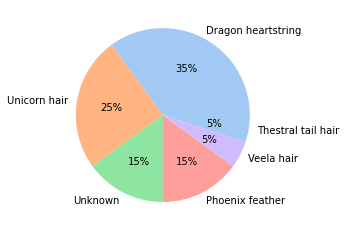

In [348]:
data = df_hp_chars['core'].value_counts().values
labels = df_hp_chars['core'].value_counts().index

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

We can see that the Unicorn hair and Dragon Hearstring are the "most popular" within the character with a known wand core. We will also quickly inspect the different wood used in the character wands. 

In [350]:
df_hp_chars['wood'].value_counts()

Walnut      2
Cherry      2
Yew         1
Larch       1
Birch       1
Hazel       1
Fir         1
Vine        1
Rosewood    1
Cedar       1
Alder       1
Holly       1
Chestnut    1
Hornbeam    1
Elm         1
Hawthorn    1
Cypress     1
Elder       1
Name: wood, dtype: int64

From the above count, we can see that the known wand mostly have different woods, this is a great news for our interactive visualisation as this means that choosing a wood will constraint the set of similar characters. 

##### Physical traits

Another interesting feature of this dataset is the physical characteristics such as the eye and hair color that might be available for some characters. Let us first see for how many information we have on the characters. 

In [357]:
df_hp_chars.loc[:,['eye_color', "hair_color"]].count()

eye_color     144
hair_color    282
dtype: int64

##### Blood types

In Harry Potter, the blood type is something importnat for the antagonist of the Boy-Who-Lived. Even though, most of the characters don't care about the blood ascendent of others, it might be interseting to see the distribution of blood types over the character. Furthermore, since one of our visualisations will be based on the blood types, it is important to check these data. 

In [377]:
def format_blood_type(blood):
    if blood is None or "Magical to some extent" == blood: 
        return None
    if "pure-blood or half-blood" in blood.lower() or "half-blood or pure-blood" in blood.lower() or "Pure blood or Half-blood" == blood:
        return "Pure-blood or Half-blood"
    elif "Muggle-born or half-blood" == blood:
        return "Muggle-born or half-blood"
    elif "muggle-born" in blood.lower():
        return "Muggle-born"
    elif "squib" in blood.lower():
        return "Squib"
    elif "Part-Human (Half-giant)" == blood: 
        return "Part-Human (Half-giant)"
    elif "pure-blood" in blood.lower(): 
        return "Pure-blood"
    elif "half-blood" in blood.lower():
        return "Half-blood"
    else:
        return blood
    

In [378]:
df_hp_chars['ancestry'].apply(format_blood_type).value_counts()

Pure-blood or Half-blood     100
Pure-blood                    73
Muggle                        72
Half-blood                    32
Muggle-born                   15
Squib                          8
Magical to unknown extent      6
Muggle-born or half-blood      2
Part-Human (Half-giant)        2
Muggles                        2
Quarter-Veela                  2
Part-Goblin                    1
Giant                          1
Half-Veela                     1
Underbeing                     1
One-eighth Veela               1
Name: ancestry, dtype: int64

In [365]:
df_hp_chars[df_hp_chars["ancestry"]=="Quarter-Veela"].head(10)

,id,name,birth,death,species,ancestry,gender,hair_color,eye_color,patronus,...,books_featured_in,nb_books_featured_in,wood_x,length_x,core_x,Note_x,wood_y,length_y,core_y,Note_y
505,547,Fleur Delacour,"Pre 30 October, 1977",None,1/4 Veela,Quarter-Veela,female,Silvery-blonde,Dark blue,Non-corporeal,...,"[4, 5, 6, 7]",4,Rosewood,9.5,Phoenix feather,In this wand the core is a hair from Fleur's g...,Rosewood,9.5,Phoenix feather,In this wand the core is a hair from Fleur's g...
506,548,Gabrielle Delacour,between 31 July 1985 and 30 July 1986,None,Human (Veela ancestry),Quarter-Veela,female,Silvery-blonde,None,None,...,"[4, 5, 6, 7]",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Age/Deaths

##### Species

#### Association between characters

#### Spells

##### Basic analysis

##### Most popular spells

#### Books

In [51]:
dum = pd.get_dummies(df['associated_groups'].apply(pd.Series).stack()).groupby(level=0).sum()
dum.head(3)

/var/folders/vf/btrykr5n65v_k_lwb61317k80000gn/T/ipykernel_45954/2541504712.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dum = pd.get_dummies(df['associated_groups'].apply(pd.Series).stack()).groupby(level=0).sum()


,,Abbott family,Acolytes,Acromantula colony,Advance Guard,Africa,Albus Dumbledore,Albus Potter,Alderton family,Algie (formerly),...,Wizarding Examinations Authority,Wizarding Wireless Network,Wizengamot,Wizengamot (formally),Wool's Orphanage,Wool's orphanage,Zabini family,Zoo,her family,nationality = Welsh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
def plot_histogram_association(dummies, threshold):
    dummies2 = dummies.copy()
    print(dummies2.shape)
    dummies2.replace(0, np.nan).dropna(axis=1, thresh=threshold, inplace=True)
    print(dummies2.shape)
    sns.displot(dummies2.sum(axis=0), log=(False,True))

(545, 399)
(545, 399)


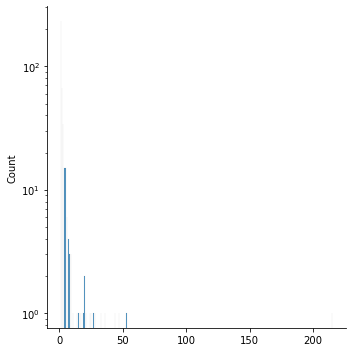

In [71]:
plot_histogram_association(dum, 3)

In [9]:
df.head(10)

,id,name,birth,death,species,ancestry,gender,hair_color,eye_color,wand,patronus,house,associated_groups,books_featured_in
0,1,Euan Abercrombie,between 1 September 1983 and 31 August 1984,None,Human,None,Male,None,None,None,None,Gryffindor,"[Hogwarts School of Witchcraft and Wizardry, G...",[5]
1,2,Stewart Ackerley,between 1 September 1982and 31 August 1983,None,Human,None,Male,None,None,None,None,Ravenclaw,[],[4]
2,3,African prince,None,None,Human,Muggle-born or half-blood (possibly),Male,None,None,None,None,None,[Africa],[1]
3,4,Agnes's son,None,None,Human,None,Male,None,None,None,None,None,[],[5]
4,5,Cornelius Agrippa,1486,1535 (aged 48 - 49),Human,None,Male,Brown,Green,None,None,None,[],[1]
5,6,Albino peacock,Pre 1997,None,Peacock,None,Male,None,Black,None,None,None,[Lucius Malfoy (owner)],[7]
6,7,Arkie Alderton,None,None,Human,Pure-blood or Half-blood,Male,None,None,None,None,None,[Arkie Alderton's Kwik-Repair Shop],[7]
7,8,Angus,c. 1980s,None,Human,None,Male,Brown,None,None,None,None,[],[1]
8,9,Antioch Peverell's killer,None,None,Human,None,Male,None,None,Unknown wand,None,None,[],[7]
9,10,Apothecary shopkeeper,None,None,Human,None,Male,White,None,None,None,None,[Apothecary],[1]


### Movie Datasets

##### 